<a href="https://colab.research.google.com/github/mmrepos/Genetic_Sequence_Analysis_Using_DNN/blob/main/Genetic_Sequence_Analysis_Using_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
#####################################################################################################################
#
#   Genetic sequence analysis using deep neural network analysis
#
#####################################################################################################################

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
import warnings
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', module='sklearn')
warnings.filterwarnings('ignore', module='IPython')

In [90]:
# Load the clinvar_conflicting.csv files and assign the variable name dataFile
dataFile = pd.read_csv\
(f'https://raw.githubusercontent.com/mmrepos/'\
'Genetic_Sequence_Analysis_Using_DNN/main/'
'Dataset/clinvar_conflicting.csv')
# Inspect the first ten records in the DataFrame
dataFile.head(10)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
5,1,2160554,G,C,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.700,4.079099,-2.0
6,1,3328358,T,C,0.0000,0.00000,0.0000,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,0.172,-0.543433,-1.0
7,1,3328659,C,T,0.1523,0.13103,0.1060,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,23.000,3.424422,-3.0
8,1,3347452,G,A,0.0000,0.00357,0.0030,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",NaN,Left_ventricular_noncompaction_8|not_specified...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,11.360,1.126629,1.0
9,1,5925304,G,A,0.0045,0.00231,0.0058,"MedGen:C0687120,Orphanet:ORPHA655,SNOMED_CT:20...",NaN,Nephronophthisis|not_specified,...,deleterious,benign,NaN,NaN,NaN,NaN,0.021,22.100,2.969650,-1.0


In [91]:
dataFile.shape

(65188, 46)

In [92]:
dataFile.CLASS.value_counts()

0    48754
1    16434
Name: CLASS, dtype: int64

In [93]:
# get unique values of a column in a Pandas dataframe
pd.DataFrame([[i, len(dataFile[i].unique())] 
              for i in dataFile.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable')

,Unique Values
Variable,
CHROM,38
POS,63115
REF,866
ALT,458
AF_ESP,2842
AF_EXAC,6667
AF_TGP,2087
CLNDISDB,9234
CLNDISDBINCL,94


In [94]:
#
unique_columns = pd.DataFrame([[i, len(dataFile[i].unique())] for i in
                              dataFile.columns], columns=['Variable',
                              'Unique Values']).set_index('Variable')
to_drop = list(unique_columns[unique_columns['Unique Values']
               > 3000].index)
dataFile.drop(to_drop, axis=1, inplace=True)

In [95]:
# get unique values of a column in a Pandas dataframe
pd.DataFrame([[i, len(dataFile[i].unique())] 
              for i in dataFile.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable')

,Unique Values
Variable,
CHROM,38
REF,866
ALT,458
AF_ESP,2842
AF_TGP,2087
CLNDISDBINCL,94
CLNDNINCL,102
CLNSIGINCL,138
CLNVC,7


In [96]:
#
unique_columns = pd.DataFrame([[i, len(dataFile[i].unique())] for i in
                              dataFile.columns], columns=['Variable',
                              'Unique Values']).set_index('Variable')
to_drop = list(unique_columns[unique_columns['Unique Values']
               > 3000].index)
dataFile.drop(to_drop, axis=1, inplace=True)

In [97]:
pd.DataFrame([[i, len(dataFile[i].unique())] for i in dataFile.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable'
        )

,Unique Values
Variable,
CHROM,38
REF,866
ALT,458
AF_ESP,2842
AF_TGP,2087
CLNDISDBINCL,94
CLNDNINCL,102
CLNSIGINCL,138
CLNVC,7


In [98]:
# Check and manage NULL values in the data frame.

number_missing = dataFile.isnull().sum()
percentage_missing = dataFile.isnull().sum().apply(lambda x: x \
        / dataFile.shape[0] * 100)

In [99]:
data_missing = pd.DataFrame({'Number Missing': number_missing,
                            'Percentage Missing': percentage_missing})

# Percentage of missing data in the dataframe in descending order

data_missing['Percentage Missing'].sort_values(ascending=False)

MOTIF_NAME            99.996932
MOTIF_SCORE_CHANGE    99.996932
HIGH_INF_POS          99.996932
MOTIF_POS             99.996932
DISTANCE              99.834325
SSR                   99.800577
CLNDISDBINCL          99.743818
CLNDNINCL             99.743818
CLNSIGINCL            99.743818
INTRON                86.495981
PolyPhen              61.962324
SIFT                  61.900963
BLOSUM62              60.739707
BAM_EDIT              50.958765
Amino_acids           15.346383
Codons                15.346383
LoFtool                6.462846
MC                     1.297785
SYMBOL                 0.024544
BIOTYPE                0.024544
STRAND                 0.021476
Feature_type           0.021476
Feature                0.021476
REF                    0.000000
IMPACT                 0.000000
Consequence            0.000000
Allele                 0.000000
CLASS                  0.000000
ORIGIN                 0.000000
CLNVC                  0.000000
AF_TGP                 0.000000
AF_ESP  

In [100]:
# Drop the columns where >= 20% of the data is missing

list_to_drop = list(data_missing[data_missing['Percentage Missing']
                 >= 20].index)
dataFile.drop(list_to_drop, axis=1, inplace=True)

# Check the NULL values in a data frame.

dataFile.isnull().sum()

CHROM               0
REF                 0
ALT                 0
AF_ESP              0
AF_TGP              0
CLNVC               0
MC                846
ORIGIN              0
CLASS               0
Allele              0
Consequence         0
IMPACT              0
SYMBOL             16
Feature_type       14
Feature            14
BIOTYPE            16
Amino_acids     10004
Codons          10004
STRAND             14
LoFtool          4213
dtype: int64

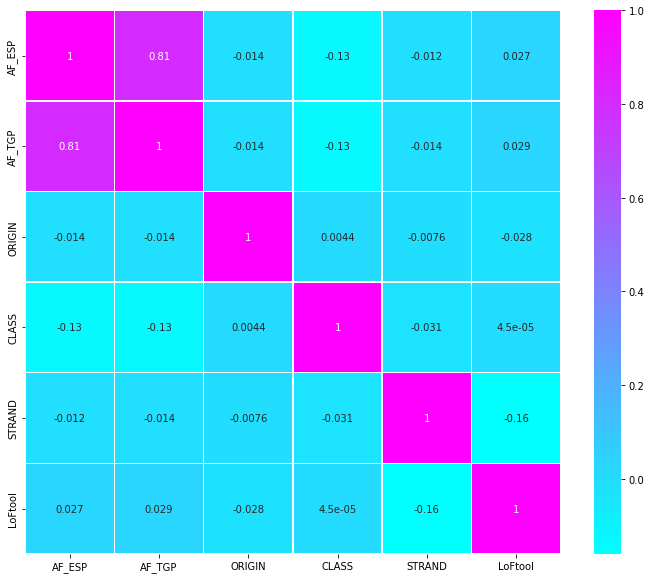

In [101]:
# Create a new figure with the specified width and height
# Display dataFrame as heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(dataFile.corr(), annot=True, linewidths=.5, cmap=plt.cm.cool)

In [102]:
# Drop the AF_TGP column that is strongly correlated
# Correlation for AF_ESP with AF_TGP is above 0.8

dataFile.drop(['AF_TGP'],axis = 1, inplace=True)

In [103]:
# Return the data type of each column in the DataFrame
# count the number of missing values instead.
# dataFile.isnull().sum() returns the number of missing values for each column

df_data = pd.DataFrame(dataFile.isnull().sum().astype(int),
                       columns=['Null'])
nullList = list(df_data[df_data['Null'] != 0].index)
dataFile[nullList].dtypes

MC               object
SYMBOL           object
Feature_type     object
Feature          object
BIOTYPE          object
Amino_acids      object
Codons           object
STRAND          float64
LoFtool         float64
dtype: object

In [104]:
# Feature Transformation
# Replace nan with most frequent value in these columns
# Columns: MC, SYMBOL, Feature_type, Feature, BIOTYPE, Amino_acids, Codons, STRAND

for x in [
    'MC',
    'SYMBOL',
    'Feature_type',
    'Feature',
    'BIOTYPE',
    'STRAND',
    'Amino_acids',
    'Codons',
    ]:
    dataFile[x].fillna(dataFile[x].mode()[0], inplace=True)

# Replace the nan value in LoFtool column with mean

dataFile['LoFtool'].fillna(dataFile['LoFtool'].mean(), inplace=True)

# check NULL values in a data frame

dataFile.isnull().sum()

CHROM           0
REF             0
ALT             0
AF_ESP          0
CLNVC           0
MC              0
ORIGIN          0
CLASS           0
Allele          0
Consequence     0
IMPACT          0
SYMBOL          0
Feature_type    0
Feature         0
BIOTYPE         0
Amino_acids     0
Codons          0
STRAND          0
LoFtool         0
dtype: int64

In [105]:
# Look at the number of unique values each variable takes, and then create
# and then create list variables for numeric, binary, categorical, and ordinal variables.

dt = pd.DataFrame([[str(i), dataFile[i].dtypes == 'object'] for i in
                  dataFile.columns], columns=['Variable', 'Object Type'
                  ]).set_index('Variable')
columns_object_type = list(dt[dt['Object Type'] == True].index)

In [106]:
# Unique value on each column in dataframe

df_data = dataFile[columns_object_type]
df_unique_values = pd.DataFrame([[i, len(df_data[i].unique())] for i in
                                df_data.columns], columns=['Variable',
                                'Unique Values']).set_index('Variable')
df_unique_values

,Unique Values
Variable,
CHROM,38
REF,866
ALT,458
CLNVC,7
MC,90
Allele,374
Consequence,48
IMPACT,4
SYMBOL,2328


In [107]:
# Check which variables are binary

variables_bin = list(df_unique_values[df_unique_values['Unique Values']
                     == 2].index)
variables_bin

['Feature_type', 'BIOTYPE']

In [108]:
# Check which variables are categorical

variables_categorical = list(df_unique_values[df_unique_values['Unique Values']
                     > 2].index)
variables_categorical

['CHROM',
 'REF',
 'ALT',
 'CLNVC',
 'MC',
 'Allele',
 'Consequence',
 'IMPACT',
 'SYMBOL',
 'Feature',
 'Amino_acids',
 'Codons']

In [109]:
# Apply function with lambda along the row

for col in variables_categorical:
    dataFile[col] = dataFile[col].apply(lambda x: str(x))

dataFile[variables_categorical].dtypes

CHROM          object
REF            object
ALT            object
CLNVC          object
MC             object
Allele         object
Consequence    object
IMPACT         object
SYMBOL         object
Feature        object
Amino_acids    object
Codons         object
dtype: object

In [110]:
# numeric

variables_numeric = list(set(dataFile.columns)
                         - set(variables_categorical)
                         - set(variables_bin))
dataFile[variables_numeric].dtypes

ORIGIN       int64
AF_ESP     float64
STRAND     float64
CLASS        int64
LoFtool    float64
dtype: object

In [111]:
# LabelBinarizer makes this process easy with the transform method.
# Accepts Categorical data as input and returns an Numpy array.
# Encode target labels with value between 0 and n_classes-1.
# To encode target values, i.e. y , and not the input X

(lb, le) = (LabelBinarizer(), LabelEncoder())

# Encode target labels ordinary variables

for col in variables_categorical:
    dataFile[col] = le.fit_transform(dataFile[col])

# Encode target labels ordinary variables encoding binary variables

for col in variables_bin:
    dataFile[col] = lb.fit_transform(dataFile[col])

dataFile.sample(5)

,CHROM,REF,ALT,AF_ESP,CLNVC,MC,ORIGIN,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,Amino_acids,Codons,STRAND,LoFtool
5100,8,437,0,0.0001,6,19,1,0,1,17,2,1872,1,98,1,780,338,-1.0,0.137000
29662,8,644,106,0.0000,6,89,1,0,88,46,1,1404,1,2104,1,577,1447,1.0,0.116000
11029,1,0,335,0.0000,6,61,1,1,296,1,3,1632,1,1247,1,78,1163,-1.0,0.761000
33389,9,184,0,0.0000,0,19,33,0,0,10,2,1571,1,1552,1,288,1636,-1.0,0.345058
61684,21,644,106,0.0000,6,89,1,0,88,46,1,719,1,624,1,968,2084,-1.0,0.951000


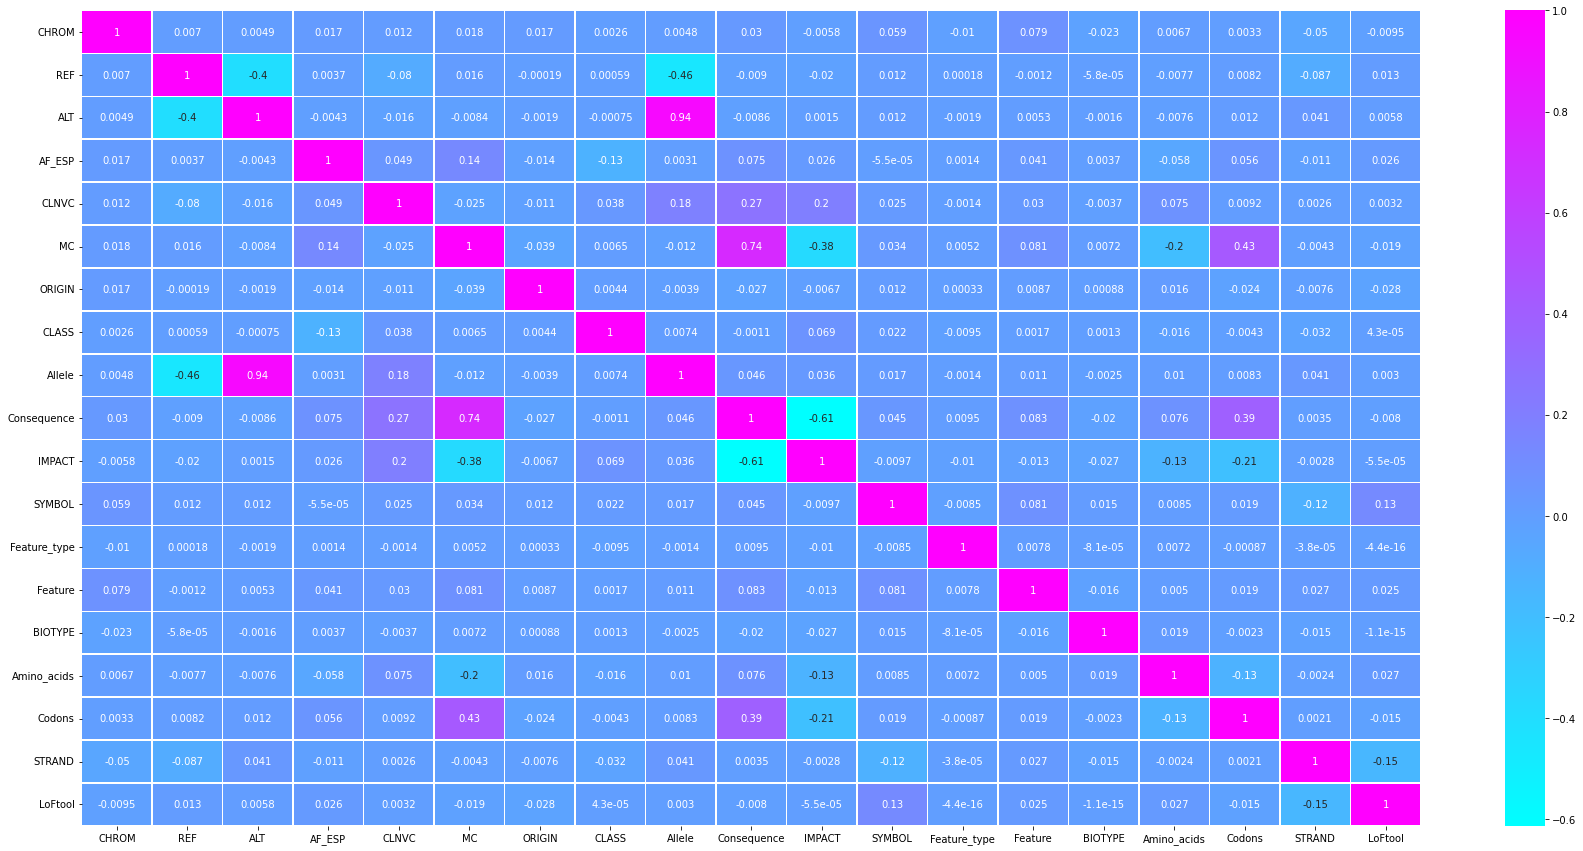

In [112]:
# Display dataFrame as heatmap

plt.figure(figsize=(30, 15))
sns.heatmap(dataFile.corr(), annot=True, linewidths=.5,
            cmap=plt.cm.cool)

In [113]:
# Drop the ALT and MC columns that are strongly correlated
# Correlation for Allele with ALT and Consequence with MC are above 0.8

dataFile.drop(['ALT', 'MC'], axis=1, inplace=True)
variables_categorical.remove('ALT')
variables_categorical.remove('MC')

In [114]:
# Transform features by scaling each feature to a given range.
# The default range for the feature returned by MinMaxScaler is 0 to 1.

mm = MinMaxScaler()
for column in [variables_categorical + variables_numeric]:
    dataFile[column] = mm.fit_transform(dataFile[column])

In [115]:
# counts = dataFile.nunique()
# counts

print(dataFile['CLASS'].value_counts()[0.])
print(dataFile['CLASS'].value_counts()[1.])

48754
16434


In [116]:
feature_columns = list(dataFile.columns)

feature_columns.remove('CLASS')


In [117]:
# Split the data into test and train data sets
# Using StratifiedShuffleSplit so proportion of distribution of
# class labels is almost even between train and test dataset.

# Using StratifiedShuffleSplit() to get the split indexes

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

(train_index, test_index) = next(sss.split(dataFile[feature_columns],
                                 dataFile.CLASS))

# Creating dataframes

X_train = dataFile.loc[train_index, feature_columns]
y_train = dataFile.loc[train_index, 'CLASS']

X_test = dataFile.loc[test_index, feature_columns]
y_test = dataFile.loc[test_index, 'CLASS']
(len(X_test), len(X_train))

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled_under, y_resampled_under =rus.fit_resample(X_train, y_train)
X_train = X_resampled_under
y_train = y_resampled_under

In [118]:
# Get feature columns count
len(feature_columns)

16

In [119]:
# Use MLP classifier to train a neural network using backprogation algorithm.
# We will compare results from this algorithm with results from manually created backpropagation algorithm

# Initialize MLP classifier (1 hidden layer)
neuralNet = MLPClassifier(hidden_layer_sizes=(16), activation='relu', solver='sgd', learning_rate='adaptive', learning_rate_init=0.1, max_iter=100)

In [120]:
neuralNet2 = MLPClassifier(hidden_layer_sizes=(16), activation='relu', solver='sgd', learning_rate='adaptive', learning_rate_init=0.01, max_iter=100)

In [121]:
neuralNet3 = MLPClassifier(hidden_layer_sizes=(16), activation='tanh', solver='sgd', learning_rate='adaptive', learning_rate_init=0.1, max_iter=100)

In [122]:
neuralNet4 = MLPClassifier(hidden_layer_sizes=(16), activation='tanh', solver='sgd', learning_rate='adaptive', learning_rate_init=0.01, max_iter=100)

In [123]:
neuralNet5 = MLPClassifier(hidden_layer_sizes=(16), activation='logistic', solver='sgd', learning_rate='adaptive', learning_rate_init=0.1, max_iter=100)

In [124]:
neuralNet6 = MLPClassifier(hidden_layer_sizes=(16), activation='logistic', solver='sgd', learning_rate='adaptive', learning_rate_init=0.01, max_iter=100)

In [125]:
# Fit neural networks to the training data
neuralNet.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=16, learning_rate='adaptive',
              learning_rate_init=0.1, max_iter=100, solver='sgd')

In [126]:
neuralNet2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=16, learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=100, solver='sgd')

In [127]:
neuralNet3.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=16,
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=100,
              solver='sgd')

In [128]:
neuralNet4.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=16,
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=100,
              solver='sgd')

In [129]:
neuralNet5.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=16,
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=100,
              solver='sgd')

In [130]:
neuralNet6.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=16,
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=100,
              solver='sgd')

In [131]:
# Use trained neural networks to generate predictions
predict_y_train = neuralNet.predict(X_train)
predict_y_test = neuralNet.predict(X_test)

In [132]:
predict_y_train2 = neuralNet2.predict(X_train)
predict_y_test2 = neuralNet2.predict(X_test)

In [133]:
predict_y_train3 = neuralNet3.predict(X_train)
predict_y_test3 = neuralNet3.predict(X_test)

In [134]:
predict_y_train4 = neuralNet4.predict(X_train)
predict_y_test4 = neuralNet4.predict(X_test)

In [135]:
predict_y_train5 = neuralNet5.predict(X_train)
predict_y_test5 = neuralNet5.predict(X_test)

In [136]:
predict_y_train6 = neuralNet6.predict(X_train)
predict_y_test6 = neuralNet6.predict(X_test)

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

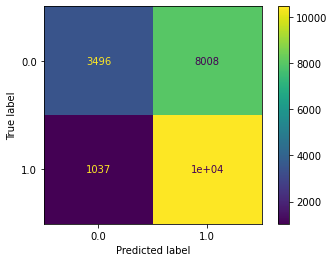

In [138]:
# Evaluation - Confusion Matrix Display - Training Data
conMtrxTrain = confusion_matrix(y_train, predict_y_train, labels=neuralNet.classes_)
conMtrxDisplayTrain = ConfusionMatrixDisplay(confusion_matrix=conMtrxTrain, display_labels=neuralNet.classes_)
conMtrxDisplayTrain.plot()
plt.show()

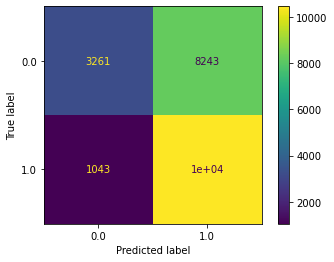

In [139]:
conMtrxTrain2 = confusion_matrix(y_train, predict_y_train2, labels=neuralNet2.classes_)
conMtrxDisplayTrain2 = ConfusionMatrixDisplay(confusion_matrix=conMtrxTrain2, display_labels=neuralNet2.classes_)
conMtrxDisplayTrain2.plot()
plt.show()

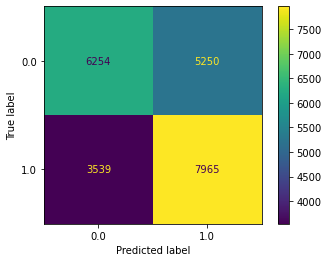

In [140]:
conMtrxTrain3 = confusion_matrix(y_train, predict_y_train3, labels=neuralNet3.classes_)
conMtrxDisplayTrain3 = ConfusionMatrixDisplay(confusion_matrix=conMtrxTrain3, display_labels=neuralNet3.classes_)
conMtrxDisplayTrain3.plot()
plt.show()

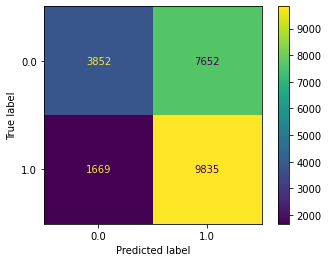

In [141]:
conMtrxTrain4 = confusion_matrix(y_train, predict_y_train4, labels=neuralNet4.classes_)
conMtrxDisplayTrain4 = ConfusionMatrixDisplay(confusion_matrix=conMtrxTrain4, display_labels=neuralNet4.classes_)
conMtrxDisplayTrain4.plot()
plt.show()

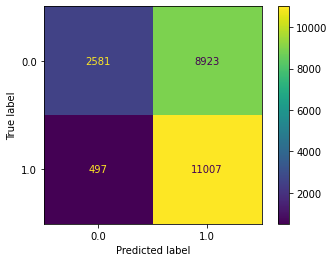

In [142]:
conMtrxTrain5 = confusion_matrix(y_train, predict_y_train5, labels=neuralNet5.classes_)
conMtrxDisplayTrain5 = ConfusionMatrixDisplay(confusion_matrix=conMtrxTrain5, display_labels=neuralNet5.classes_)
conMtrxDisplayTrain5.plot()
plt.show()

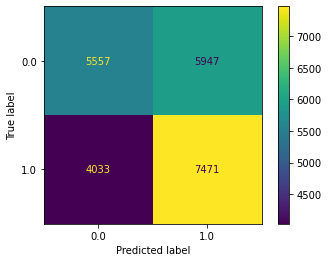

In [143]:
conMtrxTrain6 = confusion_matrix(y_train, predict_y_train6, labels=neuralNet6.classes_)
conMtrxDisplayTrain6 = ConfusionMatrixDisplay(confusion_matrix=conMtrxTrain6, display_labels=neuralNet6.classes_)
conMtrxDisplayTrain6.plot()
plt.show()

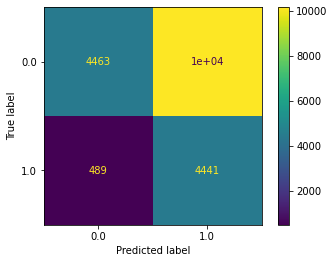

In [144]:
# Evaluation - Confusion Matrix Display - Test Data
conMtrxTest = confusion_matrix(y_test, predict_y_test, labels=neuralNet.classes_)
conMtrxDisplayTest = ConfusionMatrixDisplay(confusion_matrix=conMtrxTest, display_labels=neuralNet.classes_)
conMtrxDisplayTest.plot()
plt.show()

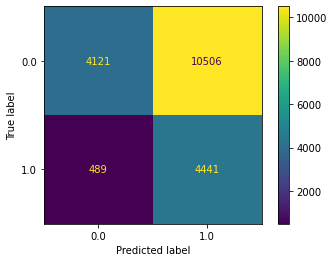

In [145]:
conMtrxTest2 = confusion_matrix(y_test, predict_y_test2, labels=neuralNet2.classes_)
conMtrxDisplayTest2 = ConfusionMatrixDisplay(confusion_matrix=conMtrxTest2, display_labels=neuralNet2.classes_)
conMtrxDisplayTest2.plot()
plt.show()

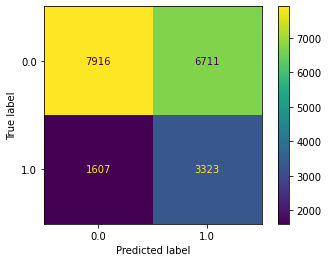

In [146]:
conMtrxTest3 = confusion_matrix(y_test, predict_y_test3, labels=neuralNet3.classes_)
conMtrxDisplayTest3 = ConfusionMatrixDisplay(confusion_matrix=conMtrxTest3, display_labels=neuralNet3.classes_)
conMtrxDisplayTest3.plot()
plt.show()

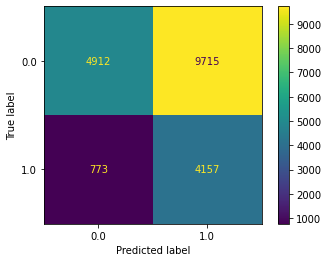

In [147]:
conMtrxTest4 = confusion_matrix(y_test, predict_y_test4, labels=neuralNet4.classes_)
conMtrxDisplayTest4 = ConfusionMatrixDisplay(confusion_matrix=conMtrxTest4, display_labels=neuralNet4.classes_)
conMtrxDisplayTest4.plot()
plt.show()

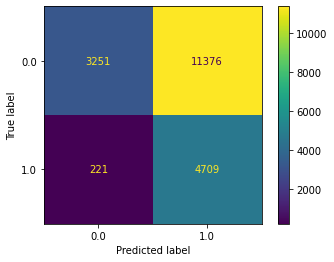

In [148]:
conMtrxTest5 = confusion_matrix(y_test, predict_y_test5, labels=neuralNet5.classes_)
conMtrxDisplayTest5 = ConfusionMatrixDisplay(confusion_matrix=conMtrxTest5, display_labels=neuralNet5.classes_)
conMtrxDisplayTest5.plot()
plt.show()

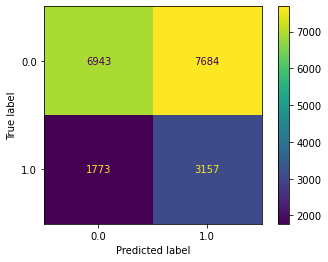

In [149]:
conMtrxTest6 = confusion_matrix(y_test, predict_y_test6, labels=neuralNet6.classes_)
conMtrxDisplayTest6 = ConfusionMatrixDisplay(confusion_matrix=conMtrxTest6, display_labels=neuralNet6.classes_)
conMtrxDisplayTest6.plot()
plt.show()

In [150]:
# Evaluation - Training Accuracy

# Get sum along diagonal of matrix (for total correct predictions)
diagMtrxSumTrain = conMtrxTrain.trace()

# Get sum of all matrix elements (for total predictions)
totMtrxSumTrain = conMtrxTrain.sum()

# Print accuracy
accTrain = diagMtrxSumTrain / totMtrxSumTrain
print('Training Accuracy 1 = ' + str(accTrain))


Training Accuracy 1 = 0.6068758692628651


In [151]:
diagMtrxSumTrain2 = conMtrxTrain2.trace()
totMtrxSumTrain2 = conMtrxTrain2.sum()
accTrain2 = diagMtrxSumTrain2 / totMtrxSumTrain2
print('Training Accuracy 2 = ' + str(accTrain2))

Training Accuracy 2 = 0.5964012517385258


In [152]:
diagMtrxSumTrain3 = conMtrxTrain3.trace()
totMtrxSumTrain3 = conMtrxTrain3.sum()
accTrain3 = diagMtrxSumTrain3 / totMtrxSumTrain3
print('Training Accuracy 3 = ' + str(accTrain3))

Training Accuracy 3 = 0.6180024339360223


In [153]:
diagMtrxSumTrain4 = conMtrxTrain4.trace()
totMtrxSumTrain4 = conMtrxTrain4.sum()
accTrain4 = diagMtrxSumTrain4 / totMtrxSumTrain4
print('Training Accuracy 4 = ' + str(accTrain4))

Training Accuracy 4 = 0.5948800417246175


In [154]:
diagMtrxSumTrain5 = conMtrxTrain5.trace()
totMtrxSumTrain5 = conMtrxTrain5.sum()
accTrain5 = diagMtrxSumTrain5 / totMtrxSumTrain5
print('Training Accuracy 5 = ' + str(accTrain5))

Training Accuracy 5 = 0.5905771905424201


In [155]:
diagMtrxSumTrain6 = conMtrxTrain6.trace()
totMtrxSumTrain6 = conMtrxTrain6.sum()
accTrain6 = diagMtrxSumTrain6 / totMtrxSumTrain6
print('Training Accuracy 6 = ' + str(accTrain6))

Training Accuracy 6 = 0.5662378303198887


In [156]:
# Evaluation - Test Accuracy

# Get sum along diagonal of matrix (for total correct predictions)
diagMtrxSumTest = conMtrxTest.trace()

# Get sum of all matrix elements (for total predictions)
totMtrxSumTest = conMtrxTest.sum()

# Print accuracy
accTest = diagMtrxSumTest / totMtrxSumTest
print('Test Accuracy 1 = ' + str(accTest))

Test Accuracy 1 = 0.45528455284552843


In [157]:
diagMtrxSumTest2 = conMtrxTest2.trace()
totMtrxSumTest2 = conMtrxTest2.sum()
accTest2 = diagMtrxSumTest2 / totMtrxSumTest2
print('Test Accuracy 2 = ' + str(accTest2))

Test Accuracy 2 = 0.43779720816076084


In [158]:
diagMtrxSumTest3 = conMtrxTest3.trace()
totMtrxSumTest3 = conMtrxTest3.sum()
accTest3 = diagMtrxSumTest3 / totMtrxSumTest3
print('Test Accuracy 3 = ' + str(accTest3))

Test Accuracy 3 = 0.5746791430178453


In [159]:
diagMtrxSumTest4 = conMtrxTest4.trace()
totMtrxSumTest4 = conMtrxTest4.sum()
accTest4 = diagMtrxSumTest4 / totMtrxSumTest4
print('Test Accuracy 4 = ' + str(accTest4))

Test Accuracy 4 = 0.46372142966712687


In [160]:
diagMtrxSumTest5 = conMtrxTest5.trace()
totMtrxSumTest5 = conMtrxTest5.sum()
accTest5 = diagMtrxSumTest5 / totMtrxSumTest5
print('Test Accuracy 5 = ' + str(accTest5))

Test Accuracy 5 = 0.40701539090862604


In [161]:
diagMtrxSumTest6 = conMtrxTest6.trace()
totMtrxSumTest6 = conMtrxTest6.sum()
accTest6 = diagMtrxSumTest6 / totMtrxSumTest6
print('Test Accuracy 6 = ' + str(accTest6))

Test Accuracy 6 = 0.5164391266554175


In [162]:
# Evaluation - Classification Report - Train Data
print('Classification Report on Training Data 1')
print(classification_report(y_train, predict_y_train))

print('Classification Report on Training Data 2')
print(classification_report(y_train, predict_y_train2))

print('Classification Report on Training Data 3')
print(classification_report(y_train, predict_y_train3))

print('Classification Report on Training Data 4')
print(classification_report(y_train, predict_y_train4))

print('Classification Report on Training Data 5')
print(classification_report(y_train, predict_y_train5))

print('Classification Report on Training Data 6')
print(classification_report(y_train, predict_y_train6))

Classification Report on Training Data 1
              precision    recall  f1-score   support

         0.0       0.77      0.30      0.44     11504
         1.0       0.57      0.91      0.70     11504

    accuracy                           0.61     23008
   macro avg       0.67      0.61      0.57     23008
weighted avg       0.67      0.61      0.57     23008

Classification Report on Training Data 2
              precision    recall  f1-score   support

         0.0       0.76      0.28      0.41     11504
         1.0       0.56      0.91      0.69     11504

    accuracy                           0.60     23008
   macro avg       0.66      0.60      0.55     23008
weighted avg       0.66      0.60      0.55     23008

Classification Report on Training Data 3
              precision    recall  f1-score   support

         0.0       0.64      0.54      0.59     11504
         1.0       0.60      0.69      0.64     11504

    accuracy                           0.62     23008
   ma

In [163]:
# Evaluation - Classification Report - Test Data
print('Classification Report on Test Data 1')
print(classification_report(y_test, predict_y_test))

print('Classification Report on Test Data 2')
print(classification_report(y_test, predict_y_test2))

print('Classification Report on Test Data 3')
print(classification_report(y_test, predict_y_test3))

print('Classification Report on Test Data 4')
print(classification_report(y_test, predict_y_test4))

print('Classification Report on Test Data 5')
print(classification_report(y_test, predict_y_test5))

print('Classification Report on Test Data 6')
print(classification_report(y_test, predict_y_test6))

Classification Report on Test Data 1
              precision    recall  f1-score   support

         0.0       0.90      0.31      0.46     14627
         1.0       0.30      0.90      0.45      4930

    accuracy                           0.46     19557
   macro avg       0.60      0.60      0.46     19557
weighted avg       0.75      0.46      0.46     19557

Classification Report on Test Data 2
              precision    recall  f1-score   support

         0.0       0.89      0.28      0.43     14627
         1.0       0.30      0.90      0.45      4930

    accuracy                           0.44     19557
   macro avg       0.60      0.59      0.44     19557
weighted avg       0.74      0.44      0.43     19557

Classification Report on Test Data 3
              precision    recall  f1-score   support

         0.0       0.83      0.54      0.66     14627
         1.0       0.33      0.67      0.44      4930

    accuracy                           0.57     19557
   macro avg     

# Neural Network model

## Layer

In [164]:
class Layer:
  def __init__(self, ip_size, op_size):
    self.bias = np.random.rand(1, op_size) - 0.5
    self.wgts = np.random.rand(ip_size, op_size) - 0.5

  def for_prop(self, ip_data):
    self.input = ip_data
    self.output = np.dot(self.input, self.wgts) + self.bias
    return self.output

  def back_prop(self, op_err, lr):
    ip_err = np.dot(op_err, self.wgts.T)
    wgts_err = np.dot(self.input.T, op_err)

    self.wgts -= lr * wgts_err
    self.bias -= lr * op_err
    return ip_err

## Activation

In [165]:
class Activation:
  def __init__(self, activation_function, activation_derivative_function):
    self.activation_derivative_function = activation_derivative_function
    self.activation_function = activation_function

  def for_prop(self, ip_data):
    self.input = ip_data
    self.output = self.activation_function(self.input)
    return self.output

  def back_prop(self, op_err, lr):
    return self.activation_derivative_function(self.input) * op_err

## Activation Functions

In [166]:
def tanh(x):
  return np.tanh(x);

def tanh_derivative(x):
  return 1-np.tanh(x)**2;

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def relu(x):
    return np.maximum(x, 0)

def relu_derivative(x):
    return np.array(x >= 0).astype('int')


## Loss Functions

In [167]:
def mean_square_err(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mean_square_err_derivative(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

## Network

In [168]:
class NeuralNetwork:
  def __init__(self, loss, loss_derivative, layers):
    self.loss = loss
    self.loss_derivative = loss_derivative
    self.layers = layers

  def predict(self, ip_data):
    result = []
    sampl_size = len(ip_data)
    for i in range(sampl_size):
      output = ip_data[i]
      for layer in self.layers:
        output = layer.for_prop(output)
      result.append(output)
    return result

  def fit(self, x_train, y_train, epoch, lr):
    sampl_size = len(x_train)
    for i in range(epoch):
      err = 0
      for j in range(sampl_size):
        output = x_train[j]
        for layer in self.layers:
          output = layer.for_prop(output)

        error = self.loss_derivative(y_train[j], output)
        for layer in reversed(self.layers):
          error = layer.back_prop(error, lr)

        err += self.loss(y_train[j], output)

      # Average error on all sampl_size
      err /= sampl_size
      print('epoch %d/%d   error=%f' % (i+1, epoch, err))

## Network Initialization

In [169]:
layers = [
  Layer(16, 10),
  Activation(relu, relu_derivative),
  Layer(10, 1),
  Activation(relu, relu_derivative),
]
nnet = NeuralNetwork(mean_square_err, mean_square_err_derivative, layers)

## Fitting

In [170]:
X_train = dataFile.loc[train_index, feature_columns]
y_train = dataFile.loc[train_index, 'CLASS']

X_test = dataFile.loc[test_index, feature_columns]
y_test = dataFile.loc[test_index, 'CLASS']
(len(X_test), len(X_train))

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled_under, y_resampled_under =rus.fit_resample(X_train, y_train)
X_train = X_resampled_under
y_train = y_resampled_under

# shuffle the training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


aX_train = X_train.to_numpy()
aX_train = aX_train.reshape(aX_train.shape[0], 1, 16)

ay_train = y_train.to_numpy().reshape(y_train.shape[0],1)
ay_train = ay_train.reshape(ay_train.shape[0], 1, 1)

nnet.fit(aX_train, ay_train, epoch=5, lr=0.01)

epoch 1/5   error=0.252437
epoch 2/5   error=0.249774
epoch 3/5   error=0.246623
epoch 4/5   error=0.241366
epoch 5/5   error=0.239741


In [171]:
y_train

10570    0.0
2582     0.0
4982     0.0
19860    1.0
11025    0.0
        ... 
3426     0.0
17104    1.0
4839     0.0
5342     0.0
22585    1.0
Name: CLASS, Length: 23008, dtype: float64

## Predict

In [172]:
aX_test = X_test.to_numpy()
aX_test = aX_test.reshape(aX_test.shape[0], 1, 16)
output = nnet.predict(aX_test)

predict_y = np.array(output)
ay_test = y_test.to_numpy()
ay_test = ay_test.reshape(ay_test.shape[0], 1, 1)

apredict_y = predict_y.reshape(predict_y.shape[0], 1)
aay_test = ay_test.reshape(ay_test.shape[0], 1)

## Accuracy

In [173]:
np.unique(apredict_y.round())
print(apredict_y[20:])

[[0.41453859]
 [0.22718647]
 [0.53314103]
 ...
 [0.24598525]
 [0.50806328]
 [0.53314103]]


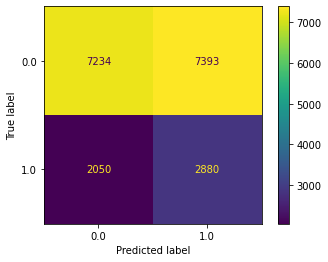

Accuracy = 0.5171549828705834


In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = [0., 1.]
conMtrx = confusion_matrix(aay_test, apredict_y.round(), labels=labels)
conMtrxDisplay = ConfusionMatrixDisplay(confusion_matrix=conMtrx, display_labels=labels)
conMtrxDisplay.plot()
plt.show()

# Evaluation - Accuracy

# Get sum along diagonal of matrix (for total correct predictions)
diagMtrxSum = conMtrx.trace()

# Get sum of all matrix elements (for total predictions)
totMtrxSum = conMtrx.sum()

# Print accuracy
acc = diagMtrxSum / totMtrxSum
print('Accuracy = ' + str(acc))

## Model Eval

Activation: relu | Learning Rate: 0.1 | Epochs: 5
epoch 1/5   error=0.278514
epoch 2/5   error=0.385578
epoch 3/5   error=0.500000
epoch 4/5   error=0.500000
epoch 5/5   error=0.500000


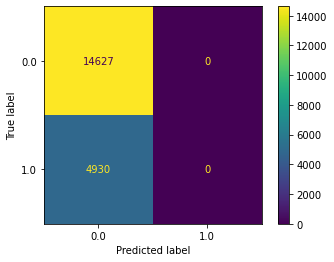

Accuracy = 0.7479163470879991
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86     14627
         1.0       0.00      0.00      0.00      4930

    accuracy                           0.75     19557
   macro avg       0.37      0.50      0.43     19557
weighted avg       0.56      0.75      0.64     19557


Activation: tanh | Learning Rate: 0.1 | Epochs: 5
epoch 1/5   error=0.264948
epoch 2/5   error=0.259656
epoch 3/5   error=0.257367
epoch 4/5   error=0.256370
epoch 5/5   error=0.255755


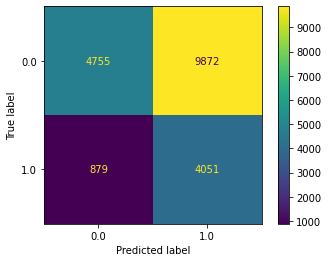

Accuracy = 0.45027355933936697
              precision    recall  f1-score   support

         0.0       0.84      0.33      0.47     14627
         1.0       0.29      0.82      0.43      4930

    accuracy                           0.45     19557
   macro avg       0.57      0.57      0.45     19557
weighted avg       0.70      0.45      0.46     19557


Activation: sigmoid | Learning Rate: 0.1 | Epochs: 5
epoch 1/5   error=0.252431
epoch 2/5   error=0.250827
epoch 3/5   error=0.247504
epoch 4/5   error=0.242618
epoch 5/5   error=0.240005


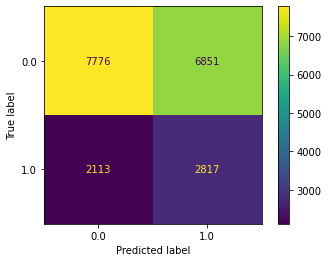

Accuracy = 0.5416474919466175
              precision    recall  f1-score   support

         0.0       0.79      0.53      0.63     14627
         1.0       0.29      0.57      0.39      4930

    accuracy                           0.54     19557
   macro avg       0.54      0.55      0.51     19557
weighted avg       0.66      0.54      0.57     19557




In [175]:
layers = {
  "relu": [
    Layer(16, 10),
    Activation(relu, relu_derivative),
    Layer(10, 5),
    Activation(relu, relu_derivative),
    Layer(5, 1),
    Activation(relu, relu_derivative),
    # Layer(10, 1),
    # Activation(sigmoid, sigmoid_derivative),
  ],

  "tanh": [
    Layer(16, 10),
    Activation(tanh, tanh_derivative),
    Layer(10, 5),
    Activation(tanh, tanh_derivative),
    Layer(5, 1),
    Activation(tanh, tanh_derivative),
    # Layer(10, 1),
    # Activation(sigmoid, sigmoid_derivative),
  ],

  "sigmoid": [
      Layer(16, 10),
      Activation(sigmoid, sigmoid_derivative),
      Layer(10, 5),
      Activation(sigmoid, sigmoid_derivative),
      Layer(5, 1),
      Activation(sigmoid, sigmoid_derivative),
      # Layer(10, 1),
      # Activation(sigmoid, sigmoid_derivative),
    ]
}

lrs = [0.1]

epochs = [5]

for act, layer in layers.items():
  for lr in lrs:
    for epoch in epochs:
      # print("Activation function: " + act + " lr: " + lr + " epoch ")
      model_type = ' | '.join(['Activation: ' + act, 'Learning Rate: ' + str(lr), 'Epochs: ' + str(epoch)])
      print(model_type)

      nnet = NeuralNetwork(mean_square_err, mean_square_err_derivative, layer)

      aX_train = X_train.to_numpy()
      aX_train = aX_train.reshape(aX_train.shape[0], 1, 16)

      ay_train = y_train.to_numpy().reshape(y_train.shape[0],1)
      ay_train = ay_train.reshape(ay_train.shape[0], 1, 1)

      nnet.fit(aX_train, ay_train, epoch=epoch, lr=lr)


      # Predict
      aX_test = X_test.to_numpy()
      aX_test = aX_test.reshape(aX_test.shape[0], 1, 16)
      output = nnet.predict(aX_test)

      predict_y = np.array(output)
      ay_test = y_test.to_numpy()
      ay_test = ay_test.reshape(ay_test.shape[0], 1, 1)

      apredict_y = predict_y.reshape(predict_y.shape[0], 1)
      aay_test = ay_test.reshape(ay_test.shape[0], 1)
      apredict_y = apredict_y.round()

      from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
      labels = [0., 1.]
      conMtrx = confusion_matrix(aay_test, apredict_y, labels=labels)
      conMtrxDisplay = ConfusionMatrixDisplay(confusion_matrix=conMtrx, display_labels=labels)
      conMtrxDisplay.plot()
      plt.show()

      # Evaluation - Accuracy

      # Get sum along diagonal of matrix (for total correct predictions)
      diagMtrxSum = conMtrx.trace()

      # Get sum of all matrix elements (for total predictions)
      totMtrxSum = conMtrx.sum()

      # Print accuracy
      accuracy = diagMtrxSum / totMtrxSum


      # from sklearn.metrics import accuracy_score
      # accuracy = accuracy_score(aay_test, apredict_y)


      print('Accuracy = ' + str(accuracy))
      print(classification_report(aay_test, apredict_y))
      print()